In [130]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pycaret
from pycaret.classification import *
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [131]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Pycaret Run

In [132]:
data=pd.read_pickle('data/fitbit_sema_to_model.pkl')

# just drop all NaNs for now (we need to discuss how we will fill them later)
data=data.dropna()
data=data.reset_index()
data=data.drop(columns='index')

# fill NaNs with the mean value of the column where they are
#data=data.fillna(data.mean())

data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,TENSE/ANXIOUS,TIRED,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,34.611011,57.481,119.212,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
1,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
2,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,1,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
3,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
4,34.519386,69.128,18.231,18.0,64.0,0.700000,0.650,0.566667,-1.329356,2154.91,...,1,0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,0,0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869
1095,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,0,0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869
1096,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869
1097,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869


In [133]:
data.columns

Index(['nightly_temperature', 'nremhr', 'rmssd', 'full_sleep_breathing_rate',
       'stress_score', 'sleep_points_percentage', 'exertion_points_percentage',
       'responsiveness_points_percentage', 'daily_temperature_variation',
       'calories', 'filteredDemographicVO2Max', 'distance', 'activityType',
       'bpm', 'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'resting_hr', 'sleep_duration', 'minutesToFallAsleep', 'minutesAsleep',
       'minutesAwake', 'minutesAfterWakeup', 'sleep_efficiency',
       'sleep_deep_ratio', 'sleep_wake_ratio', 'sleep_light_ratio',
       'sleep_rem_ratio', 'steps', 'minutes_in_default_zone_1',
       'minutes_below_default_zone_1', 'minutes_in_default_zone_2',
       'minutes_in_default_zone_3', 'age', 'gender', 'bmi', 'ALERT', 'HAPPY',
       'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED',
       'month_sin', 'weekday_sin', 'week_sin', 'day_sin', 

In [134]:
data["negative_feelings"] = np.where(data['TENSE/ANXIOUS']== 1, 1, np.where(data['ALERT']==1,1, np.where(data['SAD']==1,1, np.where(data['TIRED']==1,1, 0))))
data["negative_feelings"].value_counts()

0    622
1    477
Name: negative_feelings, dtype: int64

In [135]:
data.columns

Index(['nightly_temperature', 'nremhr', 'rmssd', 'full_sleep_breathing_rate',
       'stress_score', 'sleep_points_percentage', 'exertion_points_percentage',
       'responsiveness_points_percentage', 'daily_temperature_variation',
       'calories', 'filteredDemographicVO2Max', 'distance', 'activityType',
       'bpm', 'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'resting_hr', 'sleep_duration', 'minutesToFallAsleep', 'minutesAsleep',
       'minutesAwake', 'minutesAfterWakeup', 'sleep_efficiency',
       'sleep_deep_ratio', 'sleep_wake_ratio', 'sleep_light_ratio',
       'sleep_rem_ratio', 'steps', 'minutes_in_default_zone_1',
       'minutes_below_default_zone_1', 'minutes_in_default_zone_2',
       'minutes_in_default_zone_3', 'age', 'gender', 'bmi', 'ALERT', 'HAPPY',
       'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED',
       'month_sin', 'weekday_sin', 'week_sin', 'day_sin', 

In [136]:
data = data.drop(columns=['ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS','TIRED'])

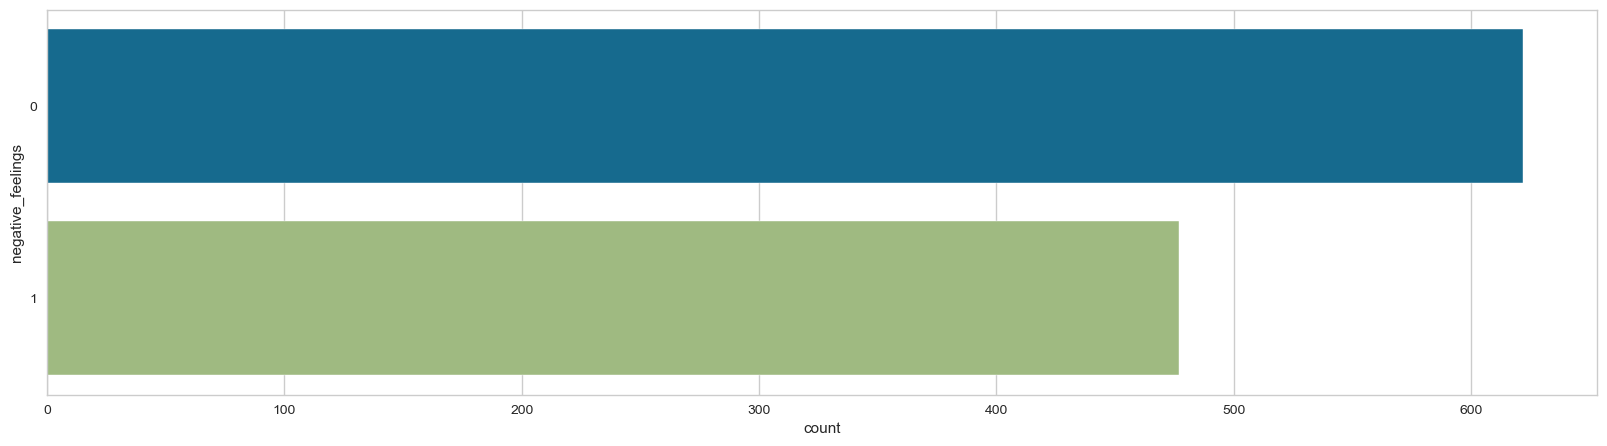

In [137]:
plt.figure(figsize=(20,5))
sns.countplot(y="negative_feelings", data=data);

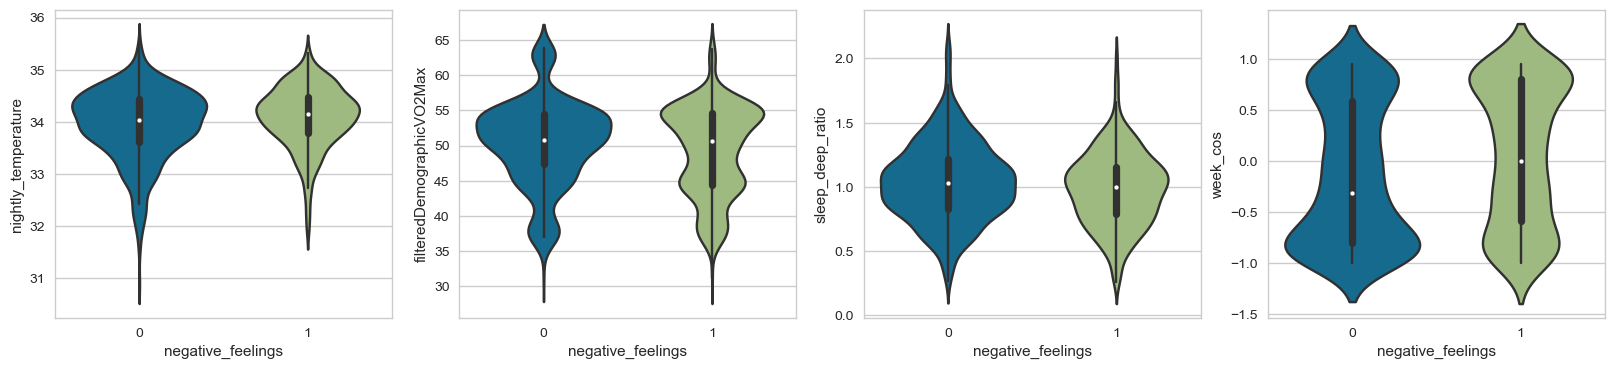

In [138]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4))

plt.subplot(1, 4, 1)
sns.violinplot(x='negative_feelings', y='nightly_temperature', data=data, split=True, scale='count');

plt.subplot(1, 4, 2)
sns.violinplot(x='negative_feelings', y='filteredDemographicVO2Max',  data=data, split=True, scale='count');

plt.subplot(1, 4, 3)
sns.violinplot(x='negative_feelings', y='sleep_deep_ratio', data=data, split=True, scale='count');

plt.subplot(1, 4, 4)
sns.violinplot(x='negative_feelings', y='week_cos', data=data, split=True, scale='count');

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline

In [139]:
grid = setup(data=data, target='negative_feelings', fix_imbalance = True, silent=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1099, 47)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


compare_models function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [140]:
best = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5800,0.6403,0.5298,0.5138,0.5210,0.1472,0.1477,0.1330
lightgbm,Light Gradient Boosting Machine,0.5982,0.6337,0.5303,0.5344,0.5319,0.1800,0.1803,0.0440
rf,Random Forest Classifier,0.5995,0.6262,0.5271,0.5374,0.5310,0.1816,0.1826,0.0770
ada,Ada Boost Classifier,0.5798,0.6145,0.5329,0.5166,0.5229,0.1482,0.1485,0.0440
et,Extra Trees Classifier,0.6073,0.6131,0.4694,0.5568,0.5079,0.1848,0.1877,0.0660
lda,Linear Discriminant Analysis,0.5683,0.6043,0.5450,0.5011,0.5204,0.1297,0.1308,0.0110
dt,Decision Tree Classifier,0.5956,0.6032,0.4758,0.5400,0.5051,0.1650,0.1667,0.0100
nb,Naive Bayes,0.5318,0.5645,0.7530,0.4750,0.5812,0.1097,0.1250,0.0080
knn,K Neighbors Classifier,0.5175,0.5347,0.5180,0.4476,0.4777,0.0337,0.0343,0.0130
lr,Logistic Regression,0.5149,0.5200,0.4120,0.3479,0.3755,0.0033,0.0039,0.0090


In [141]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


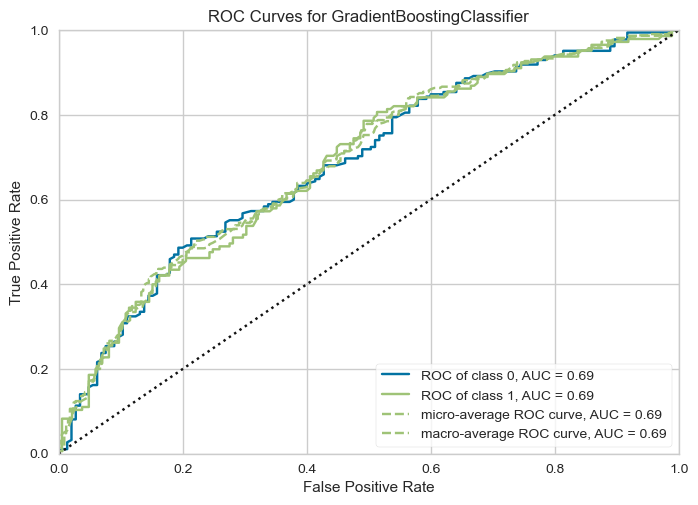

In [142]:
plot_model(best, plot = 'auc')

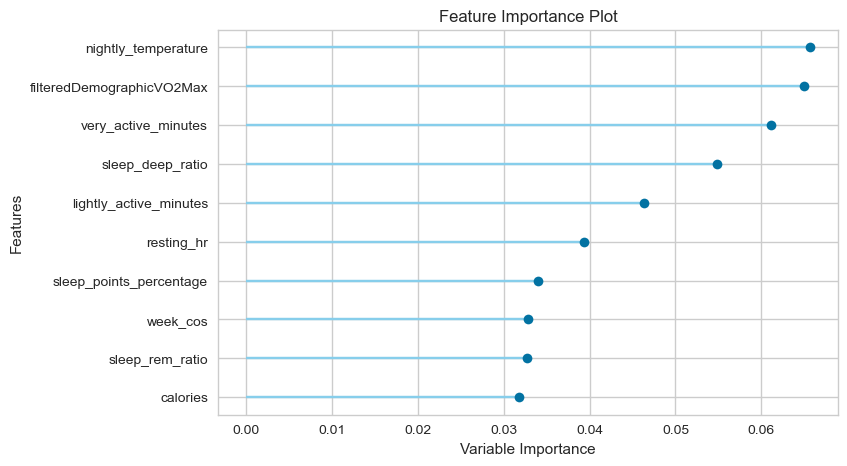

In [143]:
plot_model(best, plot='feature')

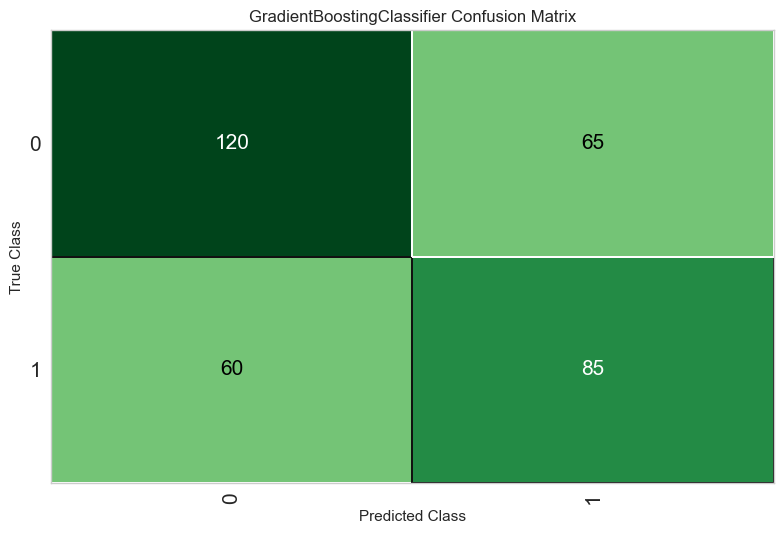

In [144]:
plot_model(best,plot='confusion_matrix')

In [145]:
# create a model
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.6546,0.5455,0.5000,0.5217,0.1348,0.1353
1,0.6364,0.6753,0.5758,0.5758,0.5758,0.2576,0.2576
2,0.5065,0.5327,0.4848,0.4324,0.4571,0.0075,0.0075
3,0.5065,0.6040,0.4242,0.4242,0.4242,-0.0076,-0.0076
4,0.6494,0.6932,0.6061,0.5882,0.5970,0.2868,0.2869
5,0.4545,0.5623,0.3636,0.3636,0.3636,-0.1136,-0.1136
6,0.6623,0.7552,0.5455,0.6207,0.5806,0.3000,0.3018
7,0.5584,0.6159,0.5000,0.5000,0.5000,0.1047,0.1047
8,0.6623,0.7315,0.6765,0.6053,0.6389,0.3236,0.3254


In [146]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [147]:
# tune a model
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6104,0.6512,0.5758,0.5429,0.5588,0.2105,0.2108
1,0.6364,0.6670,0.5758,0.5758,0.5758,0.2576,0.2576
2,0.5844,0.5720,0.5758,0.5135,0.5429,0.1642,0.1651
3,0.5195,0.5744,0.4545,0.4412,0.4478,0.0226,0.0226
4,0.6623,0.7290,0.6061,0.6061,0.6061,0.3106,0.3106
5,0.5325,0.5671,0.4848,0.4571,0.4706,0.0526,0.0527
6,0.7403,0.7435,0.6667,0.7097,0.6875,0.4656,0.4663
7,0.5714,0.6050,0.5000,0.5152,0.5075,0.1283,0.1283
8,0.6494,0.7014,0.6765,0.5897,0.6301,0.2998,0.3023


In [148]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


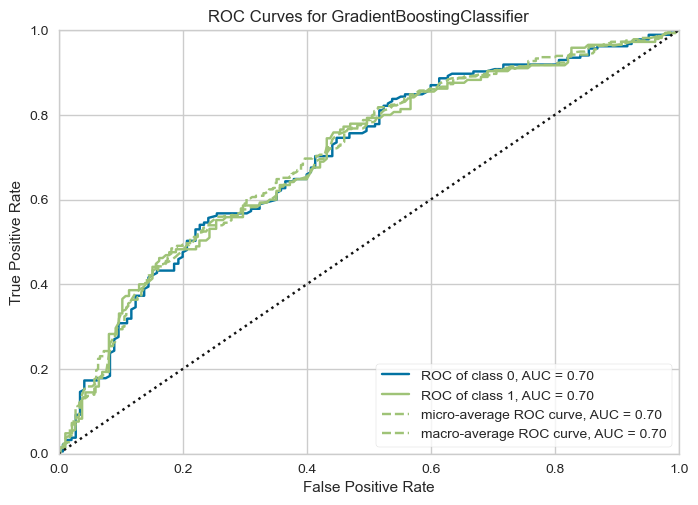

In [149]:
plot_model(tuned_gbc, plot = 'auc')

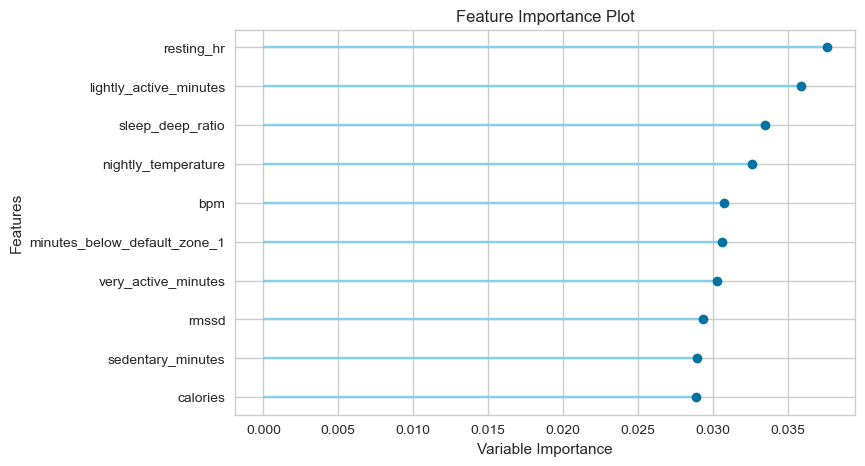

In [150]:
plot_model(tuned_gbc, plot='feature')

In [151]:
# predict on test set
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6485,0.6989,0.5862,0.6028,0.5944,0.2844,0.2844


In [152]:
# save the model
save_model(tuned_gbc,"models_saved/tuned_gbc")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='negative_feelings',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                                             learning_rate=0.01, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
        

In [153]:
# load a saved model
saved_model=load_model('models_saved/tuned_gbc')

Transformation Pipeline and Model Successfully Loaded


# try from scratch

In [154]:
data=pd.read_pickle('data/fitbit_sema_to_model.pkl')

#just drop all NaNs for now (we need to discuss how we will fill them later)
data=data.dropna()
data=data.reset_index()
data=data.drop(columns='index')
data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,TENSE/ANXIOUS,TIRED,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,34.611011,57.481,119.212,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
1,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
2,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,1,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
3,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
4,34.519386,69.128,18.231,18.0,64.0,0.700000,0.650,0.566667,-1.329356,2154.91,...,1,0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,0,0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869
1095,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,0,0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869
1096,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869
1097,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869


In [155]:
data["labels"] = np.where(data['TENSE/ANXIOUS']== 1, 1, np.where(data['ALERT']==1,1, np.where(data['SAD']==1,1, np.where(data['TIRED']==1,1, 0))))
data = data.drop(columns=['ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS','TIRED'])
data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,labels
0,34.611011,57.481,119.212,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,...,<19,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,0
1,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,22.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,1
2,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,22.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,1
3,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,22.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,0
4,34.519386,69.128,18.231,18.0,64.0,0.700000,0.650,0.566667,-1.329356,2154.91,...,23.0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,<19,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869,0
1095,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,<19,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869,0
1096,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,<19,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869,0
1097,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,<19,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869,1


In [156]:
data.dtypes

nightly_temperature                 float64
nremhr                              float64
rmssd                               float64
full_sleep_breathing_rate           float64
stress_score                        float64
sleep_points_percentage             float64
exertion_points_percentage          float64
responsiveness_points_percentage    float64
daily_temperature_variation         float64
calories                            float64
filteredDemographicVO2Max           float64
distance                            float64
activityType                         object
bpm                                 float64
lightly_active_minutes               object
moderately_active_minutes            object
very_active_minutes                  object
sedentary_minutes                    object
mindfulness_session                  object
resting_hr                          float64
sleep_duration                      float64
minutesToFallAsleep                 float64
minutesAsleep                   

In [157]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df

,activityType,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,age,gender,bmi
0,[Walk],112,27,31,710,False,<30,MALE,<19
1,[Workout],119,0,0,880,False,<30,MALE,22.0
2,[Workout],119,0,0,880,False,<30,MALE,22.0
3,[Workout],119,0,0,880,False,<30,MALE,22.0
4,[Walk],131,40,66,691,False,<30,FEMALE,23.0
...,...,...,...,...,...,...,...,...,...
1094,[Walk],367,23,26,462,False,>=30,FEMALE,<19
1095,[Walk],367,23,26,462,False,>=30,FEMALE,<19
1096,[Walk],309,86,66,595,False,>=30,FEMALE,<19
1097,[Walk],309,86,66,595,False,>=30,FEMALE,<19


In [158]:
data['gender'] = data['gender'].map({'MALE': 1, 'FEMALE': 0})
data['mindfulness_session'] = data['mindfulness_session'].map({'True': 1, 'False': 0})
data['age'] = data['age'].map({'<30': 1, '>=30': 0})
data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,labels
0,34.611011,57.481,119.212,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,...,<19,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,0
1,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,22.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,1
2,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,22.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,1
3,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,22.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,0
4,34.519386,69.128,18.231,18.0,64.0,0.700000,0.650,0.566667,-1.329356,2154.91,...,23.0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,<19,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869,0
1095,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,<19,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869,0
1096,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,<19,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869,0
1097,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,<19,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869,1


In [159]:
data=data.drop(columns=['activityType','lightly_active_minutes','moderately_active_minutes',
                        'very_active_minutes','sedentary_minutes','bmi','gender',
                        'mindfulness_session','age']) # for now, I drop them, and we decide how to handle them
data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,labels
0,34.611011,57.481,119.212,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,...,0.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,0
1,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,1
2,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,1
3,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,0
4,34.519386,69.128,18.231,18.0,64.0,0.700000,0.650,0.566667,-1.329356,2154.91,...,0.0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,0.0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869,0
1095,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,0.0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869,0
1096,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,0.0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869,0
1097,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,0.0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869,1


In [160]:
X = data.loc[:, data.columns != 'labels']
Y = data[['labels']]

In [161]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [162]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [163]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = None,
                               min_samples_split = 2, min_samples_leaf = 22, random_state = 42)
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=22, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [164]:
Y_Pred = classifier.predict(X_Test)

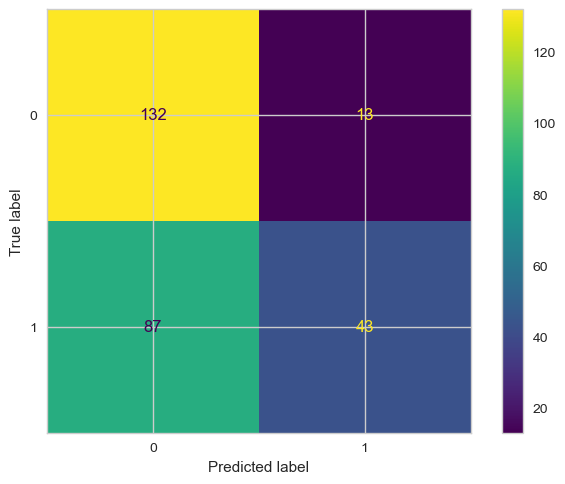

In [165]:
plot_confusion_matrix(classifier, X_Test, Y_Test)
plt.show()

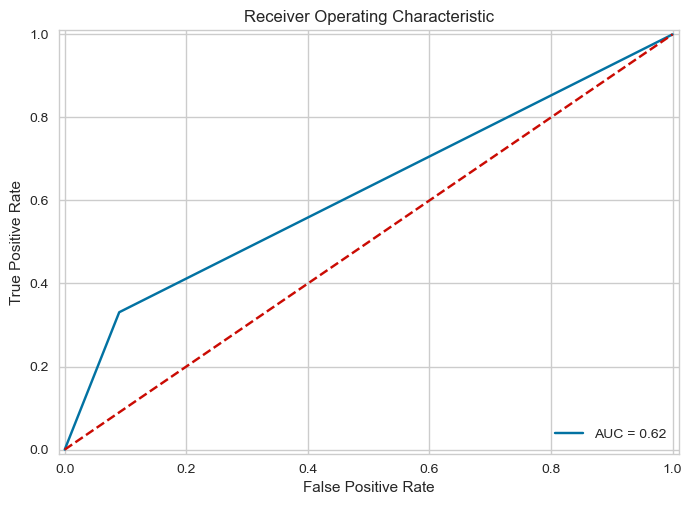

In [166]:
plot_roc_curve(Y_Test,Y_Pred)

In [167]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.60      0.91      0.73       145
           1       0.77      0.33      0.46       130

    accuracy                           0.64       275
   macro avg       0.69      0.62      0.59       275
weighted avg       0.68      0.64      0.60       275

